# **What makes a man?**
## *Final Project for Introduction to Data Science at the University of Maryland, College Park*
#### **Authors:** Nate Dudley, Tsipora Stone, and Alan Kossoy

### **Introduction**

In 2006, Tarana Burke first coined the phrase "Me Too" to help women who had survived sexual assault or violence of any kind. For 10 years after, this phrase became an instant sensation for all people who wished to report a sexual assault encounter. In October, 2017, the Me Too hashtag went viral on Twitter, with millions of users using this hashtag. After this movement, many men began to question their actions as men and what "masculinity" really entailed. To learn more about the #MeToo movement, go to https://www.nytimes.com/series/metoo-moment 

In order to discover how men truly felt about their masculinity in the wake of the "#MeToo" movement, FiveThirtyEight created a survey in partnership with SurveyMonkey and WNYC Studios in which they polled 1,615 men above the age of 18 for two weeks in May 2018 on how masculine they feel and their lifestyle choices, asking questions such as how often do you cry. The motivation for this project came from this article: https://fivethirtyeight.com/features/what-do-men-think-it-means-to-be-a-man/ and the csv file with the data resulting from this survey can be found here: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-masculinity-survey-dataset/version/96#README.md 

In this project, we want to explore what factors are considered masuculine in today's society and how men view these attributes. 

### **Data Collection**

We imported the pandas library to curate the data from the csv file (more information about Pandas can be found here - https://pandas.pydata.org/. In order to do analysis on the data, read in the csv file and store it in a pandas dataframe. We did not have to preprocess the data because it was already formatted nicely in a csv file. The dataframe has columns which include:

**start date, end date, 36 questions from the survey, race and ethnicity, education, age, amount of kids, sexual orientation**

In [4]:
import pandas as pd

raw_data = pd.read_csv("data/fivethirtyeight-masculinity-survey-dataset/raw-responses.csv")

raw_data.head(5)

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


### **Exploratory Data Analysis**

In this section of analysis, we are looking for correlations between the questions asked in the survey and people's perceived masculinity levels. In order to achieve this, we create a series of graphs showing correlation and compute the correlation coefficients and then run a decision tree on test data to see if we can predict how masculine people feel based on their answers to certain questions.

#### Masculine Plot
In this first plot we wanted to see how many people considered themselves "very masculine", "somewhat masculine", "not very masculine", "not at all masculine" and those that gave no answer. This gives us a general idea of what men think of themselves in terms of their own masculinity. 

In [5]:
import matplotlib.pyplot as plot

x = raw_data['q0001'].value_counts()
keys = list(x.keys())
keys.insert(0, keys.pop(1))

print(keys)

plot.figure(figsize = (20, 10))
plot.bar(keys, [x[k] for k in keys])
plot.xlabel('Reported Masculinity')
plot.ylabel('Number of Respondents')
plot.title('Self Reported Masculinity Distribution (Q1)')
plot.show()

['Very masculine', 'Somewhat masculine', 'Not very masculine', 'Not at all masculine', 'No answer']


<Figure size 2000x1000 with 1 Axes>

**Results:** From this graph, it is evident that most men who took this survey believe that they are somewhat masculine, with approximately 800 men giving this answer, while the second most popular category was very masculine with approximately 600 men giving this answer. This data shows that most men consider themselves on the higher end of the masculinity scale.

### **Tidying the Data**

In order to do further analysis on the data and to find the correlations between the questions asked, we tidied the data by giving "not selected" false values and everything else true values.

In [6]:
q1_answers = list(raw_data['q0001'].unique())
q1_answers.insert(0, q1_answers.pop(1))
q1_answers.insert(2, q1_answers.pop(3))
q1_answers.reverse()
q2_answers = list(raw_data['q0002'].unique())
q2_answers.insert(0, q2_answers.pop(2))
q2_answers.reverse()
q7_answers = list(raw_data['q0007_0001'].unique())
q7_answers.insert(1, q7_answers.pop(2))
q7_answers.reverse()

scrub_data = raw_data.copy()

for index1, row in raw_data.iterrows():
    scrub_data.loc[index1, 'q0001'] = int(q1_answers.index(row['q0001']))
    scrub_data.loc[index1, 'q0002'] = int(q2_answers.index(row['q0002']))
    for index2, val in row['q0007_0001':'q0007_0011'].iteritems():
        scrub_data.loc[index1, index2] = int(q7_answers.index(val))
    for index2, val in row['q0008_0001':'q0008_0012'].iteritems():
        if val == 'Not selected':
            scrub_data.loc[index1, index2] = False
        else:
            scrub_data.loc[index1, index2] = True
    for index2, val in row['q0020_0001':'q0020_0006'].iteritems():
        if val == 'Not selected':
            scrub_data.loc[index1, index2] = False
        else:
            scrub_data.loc[index1, index2] = True

q1_answers = pd.Series(q1_answers)
q2_answers = pd.Series(q2_answers)
q7_answers = pd.Series(q7_answers)

scrub_data.head(5)

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,3,3,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,3,3,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,4,2,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,4,2,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,4,4,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


#### Masculinity Vs. Importance Plot

We then created a 2D histogram, similar to a heat map, to find out if how important people think it is that others see them as masculine is correlated to how masculine they feel. The lighter colors correspond to a higher correlation value and the darker colors are less correlated. We created this graph through the matplotlib library in Python.

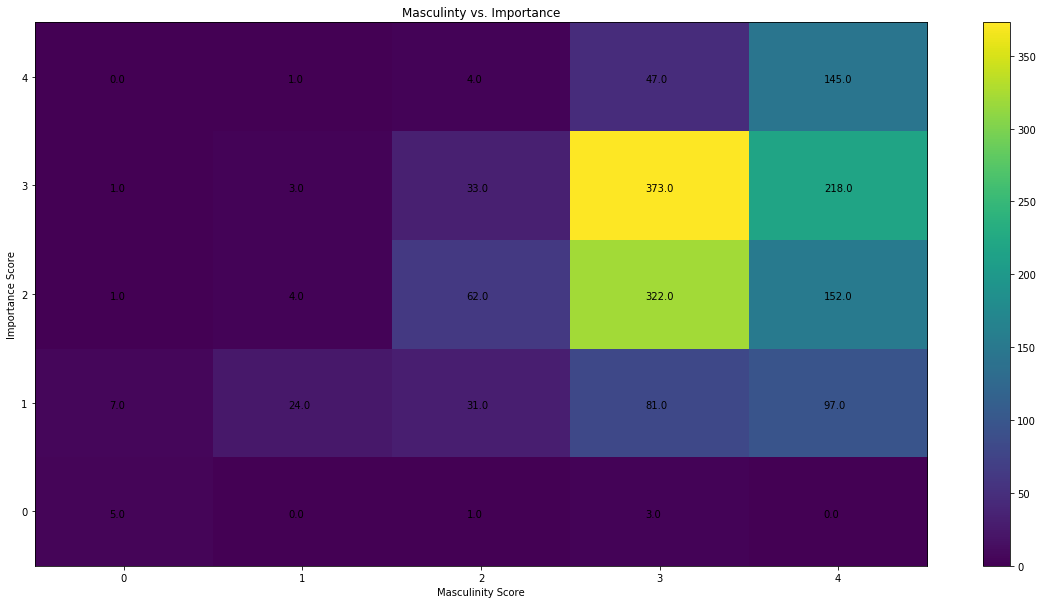

In [7]:
plot.figure(figsize = (20, 10))
hist, xval, yval, _ = plot.hist2d(scrub_data['q0001'], scrub_data['q0002'], bins = (5, 5), range = ((-.5, 4.5), (-.5, 4.5)))
for i in range(len(xval)-1):
    for j in range(len(yval)-1):
        plot.annotate(hist[i][j], (xval[i], yval[j]), xytext = (xval[i] + 0.42, yval[j] + 0.45))
plot.colorbar()
plot.xlabel('Masculinity Score')
plot.ylabel('Importance Score')
plot.title('Masculinty vs. Importance')
plot.show()

**Results:** This graph shows that high masculinity scores are pretty highly correlated with a high importance score, allowing us to conclude that importance of being seen as masculine is an important attribute to those who consider themselves masculine. 

#### Masculinity Vs. Importance Correlation

In order to find out the general correlation between masculinity and importance of masculinity, we computed the correlation coefficient utilizing pandas corr function. The result shows a positive score which indicates that the two attributes are positively correlated meaning that they are related. However, this score is not as high as we thought it would be from the histogram above, since the result was <.5, but correlation values range from -1 to +1. Therefore, we conclude that importance of masculinity somewhat affects how masculine men perceive themselves, but is not the strongest attribute of masculinity.

In [8]:
mi_corr = scrub_data[['q0001', 'q0002']].corr('pearson')

print('Masculinity/Importance Correllation = {:1.2f}'.format(mi_corr.loc['q0001', 'q0002']))

Masculinity/Importance Correllation = 0.28


#### Correlation of Each Answer to Question 7 Dataframe

In order to discover which parts of question 7 were most connected to masculinity, we calculated the correlation scores between all the parts of the question in relation to the other parts of the question. We placed these values in a dataframe so that it would be easy and neat to visualize and so we would be able to plot out this data to better see the correlations.

In [9]:
corr = scrub_data[['q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 
                   'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 
                   'q0007_0009', 'q0007_0010', 'q0007_0011']].corr('pearson')

corr

,q0007_0001,q0007_0002,q0007_0003,q0007_0004,q0007_0005,q0007_0006,q0007_0007,q0007_0008,q0007_0009,q0007_0010,q0007_0011
q0007_0001,1.000000,0.638564,0.310620,0.230794,0.097909,0.138978,0.089734,0.155071,0.191120,0.212457,0.168803
q0007_0002,0.638564,1.000000,0.398778,0.260731,0.095923,0.110426,0.140588,0.125858,0.198921,0.276904,0.197692
q0007_0003,0.310620,0.398778,1.000000,0.258264,0.037018,0.025953,0.282076,0.041334,0.146013,0.245121,0.141377
q0007_0004,0.230794,0.260731,0.258264,1.000000,0.076073,-0.019578,0.180959,0.034387,0.075461,0.233895,0.230529
q0007_0005,0.097909,0.095923,0.037018,0.076073,1.000000,0.125397,0.025055,0.064368,0.092633,0.045037,0.095174
q0007_0006,0.138978,0.110426,0.025953,-0.019578,0.125397,1.000000,-0.326650,0.240576,0.217876,0.043859,-0.047002
q0007_0007,0.089734,0.140588,0.282076,0.180959,0.025055,-0.326650,1.000000,-0.170639,-0.044106,0.135890,0.139564
q0007_0008,0.155071,0.125858,0.041334,0.034387,0.064368,0.240576,-0.170639,1.000000,0.246188,-0.026624,0.023018
q0007_0009,0.191120,0.198921,0.146013,0.075461,0.092633,0.217876,-0.044106,0.246188,1.000000,0.084940,0.062015
q0007_0010,0.212457,0.276904,0.245121,0.233895,0.045037,0.043859,0.135890,-0.026624,0.084940,1.000000,0.332715


**Results:** It is actually harder to see each question's correlation value from this dataframe than we had originally anticipated. Because of this, we decided to plot out all of the values to make it visually easier to detect trends in the data.

#### Correlation Heat Map

The answer - another heat map! We used the seaborn library, which allows for the creation of colorful plots from pandas dataframes. More information about seaborn can be found here - https://seaborn.pydata.org/. Seaborn has a heatmap function, which allowed us to easily use the dataframe above to show which questions are more correlated with each other. The lighter colors correspond to greater correlation values, while the darker colors indicate less of a correlation. The black color corresponds to a negative correlation, which means that these two attributes are not at all related.

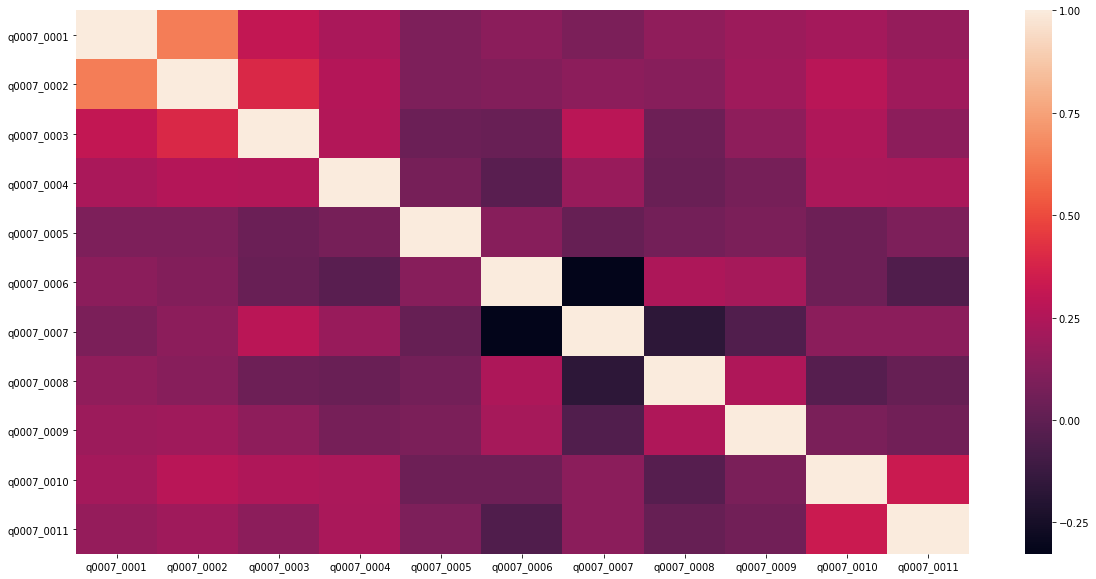

In [10]:
import seaborn as sns
fig, ax = plot.subplots(figsize = (20, 10))
sns.heatmap(corr.T, ax = ax)
plot.show()

In [11]:
for index, row in corr.iterrows():
    corr.loc[index, 'meanCorr'] = (sum(row) - 1) / 10
    
corr[['meanCorr']]

,meanCorr
q0007_0001,0.223405
q0007_0002,0.244438
q0007_0003,0.188655
q0007_0004,0.156151
q0007_0005,0.075459
q0007_0006,0.050983
q0007_0007,0.045247
q0007_0008,0.073354
q0007_0009,0.127106
q0007_0010,0.158419


In [12]:
corr = scrub_data[['q0001', 'q0007_0001', 'q0007_0002', 'q0007_0003', 
                   'q0007_0004', 'q0007_0005', 'q0007_0006', 'q0007_0007', 
                   'q0007_0008', 'q0007_0009', 'q0007_0010', 'q0007_0011']].corr('pearson')

corr[['q0001']]

,q0001
q0001,1.000000
q0007_0001,0.142660
q0007_0002,0.131143
q0007_0003,0.096200
q0007_0004,0.021537
q0007_0005,0.118729
q0007_0006,0.252835
q0007_0007,-0.088088
q0007_0008,0.197255
q0007_0009,0.175679


In [13]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

def skew(array):
    return 3 * (np.mean(array) - np.median(array)) / np.std(array)

In [14]:
x = scrub_data[['q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 
                'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 
                'q0007_0009', 'q0007_0010', 'q0007_0011',
                'q0008_0001', 'q0008_0002', 'q0008_0003', 'q0008_0004', 
                'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008', 
                'q0008_0009', 'q0008_0010', 'q0008_0011',
                'q0020_0001', 'q0020_0002', 'q0020_0003', 'q0020_0004', 
                'q0020_0005', 'q0020_0006']]
y = scrub_data[['q0001']]
x = np.array([list(i) for i in x.values])
y = np.array([list(i) for i in y.values])
kf = KFold(n_splits = 10, shuffle = True)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

Mean Accuracy   = 45.8% +- 24.4%
Median Accuracy = 46.9% +- 24.4%


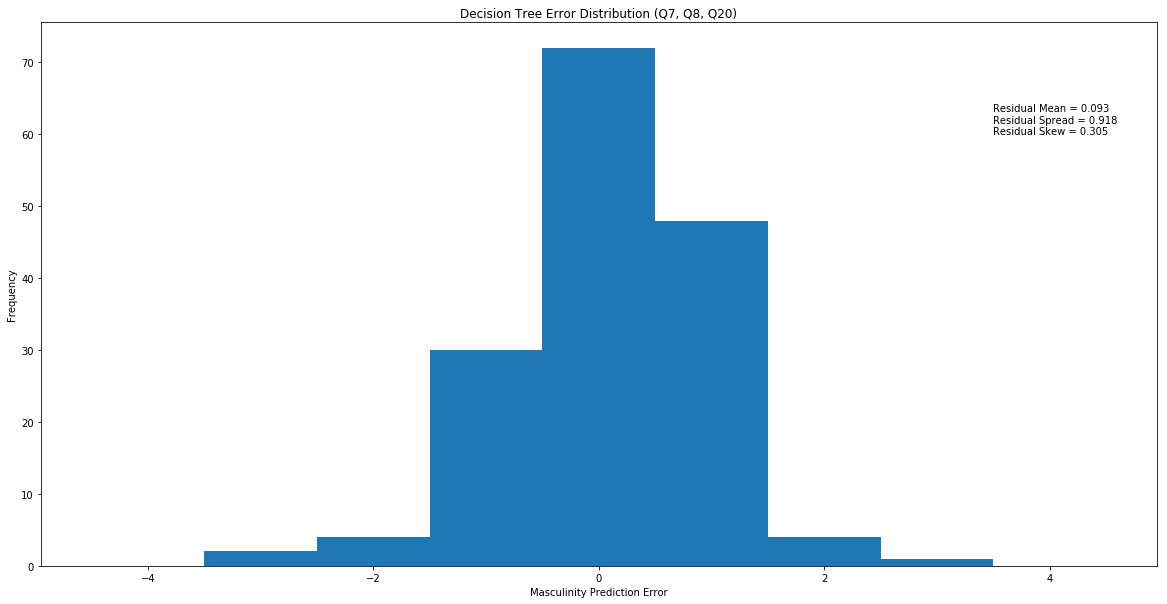

In [15]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
scores = cross_val_score(clf, x_test, y_test, cv = kf)

print('Mean Accuracy   = {0:2.1f}% +- {2:2.1f}%\nMedian Accuracy = {1:2.1f}% +- {2:2.1f}%'.format(
    np.mean(scores) * 100, np.median(scores) * 100, np.std(scores) * 200))

residuals = np.array([clf.predict([i]) for i in x_test]).reshape(-1, 1) - np.array(y_test)
plot.figure(figsize = (20, 10))
plot.hist(residuals.flatten(), bins = 9, range = (-4.5, 4.5))
plot.text(3.5, 60, 'Residual Mean = {:1.3f}\nResidual Spread = {:1.3f}\nResidual Skew = {:1.3f}'.format(residuals.mean(), residuals.std(), skew(residuals)))
plot.xlabel('Masculinity Prediction Error')
plot.ylabel('Frequency')
plot.title('Decision Tree Error Distribution (Q7, Q8, Q20)')
plot.show()

/Users/Nate/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/Nate/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/Nate/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/Nate/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged 

Mean Accuracy   = 47.7% +- 18.7%
Median Accuracy = 43.8% +- 18.7%


/Users/Nate/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


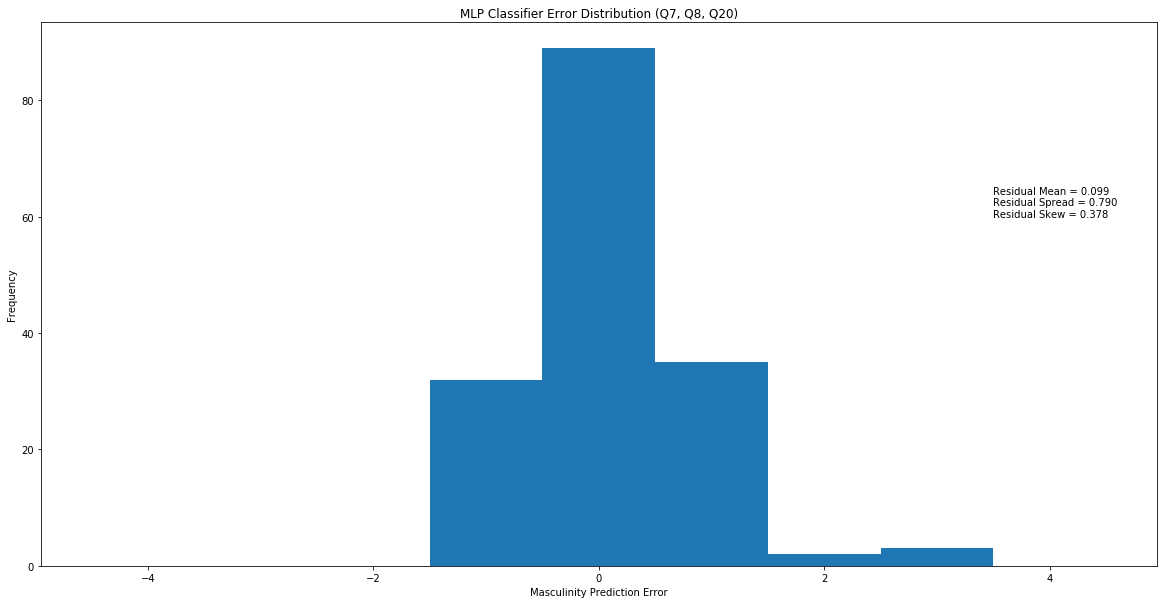

In [16]:
from sklearn import neural_network

nn = neural_network.MLPClassifier(hidden_layer_sizes = (100, 5), solver = 'sgd', max_iter = 1000)
nn.fit(x_train, y_train.reshape(-1))
scores = cross_val_score(nn, x_test, y_test.reshape(-1), cv = kf)

print('Mean Accuracy   = {0:2.1f}% +- {2:2.1f}%\nMedian Accuracy = {1:2.1f}% +- {2:2.1f}%'.format(
    np.mean(scores) * 100, np.median(scores) * 100, np.std(scores) * 200))

residuals = np.array([nn.predict([i]) for i in x_test]).reshape(-1, 1) - np.array(y_test)
plot.figure(figsize = (20, 10))
plot.hist(residuals.flatten(), bins = 9, range = (-4.5, 4.5))
plot.text(3.5, 60, 'Residual Mean = {:1.3f}\nResidual Spread = {:1.3f}\nResidual Skew = {:1.3f}'.format(residuals.mean(), residuals.std(), skew(residuals)))
plot.xlabel('Masculinity Prediction Error')
plot.ylabel('Frequency')
plot.title('MLP Classifier Error Distribution (Q7, Q8, Q20)')
plot.show()

In [17]:
from sklearn import linear_model

x = scrub_data[['q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 
                'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 
                'q0007_0009', 'q0007_0010', 'q0007_0011']]
y = scrub_data[['q0001']]
x = np.array([list(i) for i in x.values])
y = np.array([list(i) for i in y.values])
kf = KFold(n_splits = 10, shuffle = True)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

Mean Accuracy   = -5.8% +- 6.4%
Median Accuracy = -4.9% +- 6.4%


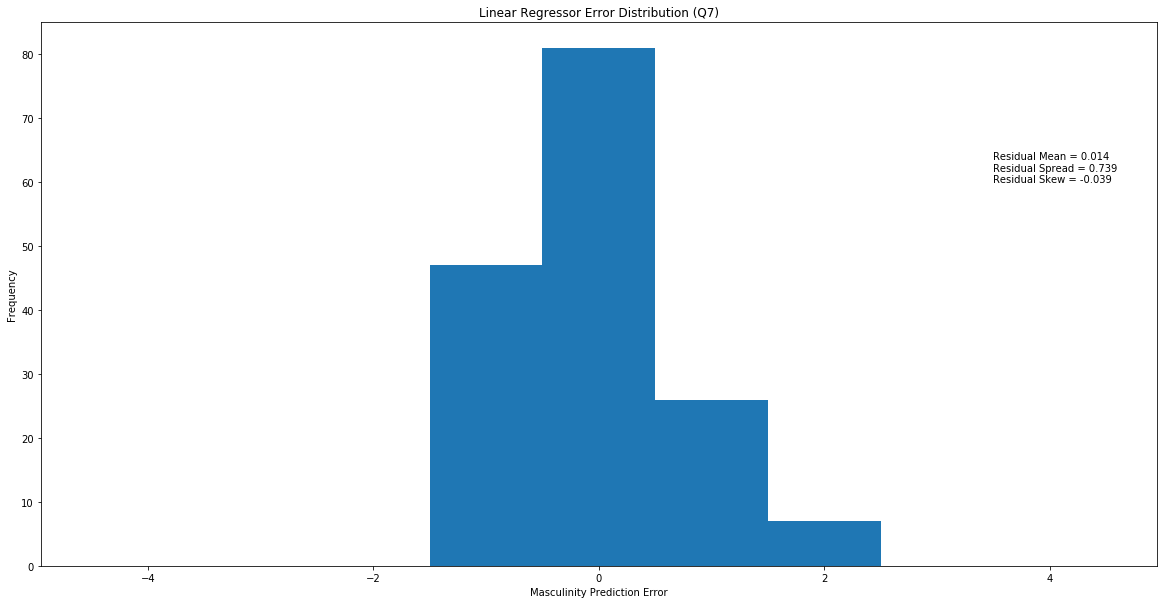

In [18]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
scores = cross_val_score(reg, x_test, y_test, cv = kf, scoring = 'neg_mean_squared_log_error')

print('Mean Accuracy   = {0:2.1f}% +- {2:2.1f}%\nMedian Accuracy = {1:2.1f}% +- {2:2.1f}%'.format(
    np.mean(scores) * 100, np.median(scores) * 100, np.std(scores) * 200))

residuals = np.array([reg.predict([i]) for i in x_test]).reshape(-1, 1) - np.array(y_test)
plot.figure(figsize = (20, 10))
plot.hist(residuals.flatten(), bins = 9, range = (-4.5, 4.5))
plot.text(3.5, 60, 'Residual Mean = {:1.3f}\nResidual Spread = {:1.3f}\nResidual Skew = {:1.3f}'.format(residuals.mean(), residuals.std(), skew(residuals)))
plot.xlabel('Masculinity Prediction Error')
plot.ylabel('Frequency')
plot.title('Linear Regressor Error Distribution (Q7)')
plot.show()

Mean Accuracy   = 44.7% +- 19.0%
Median Accuracy = 48.5% +- 19.0%


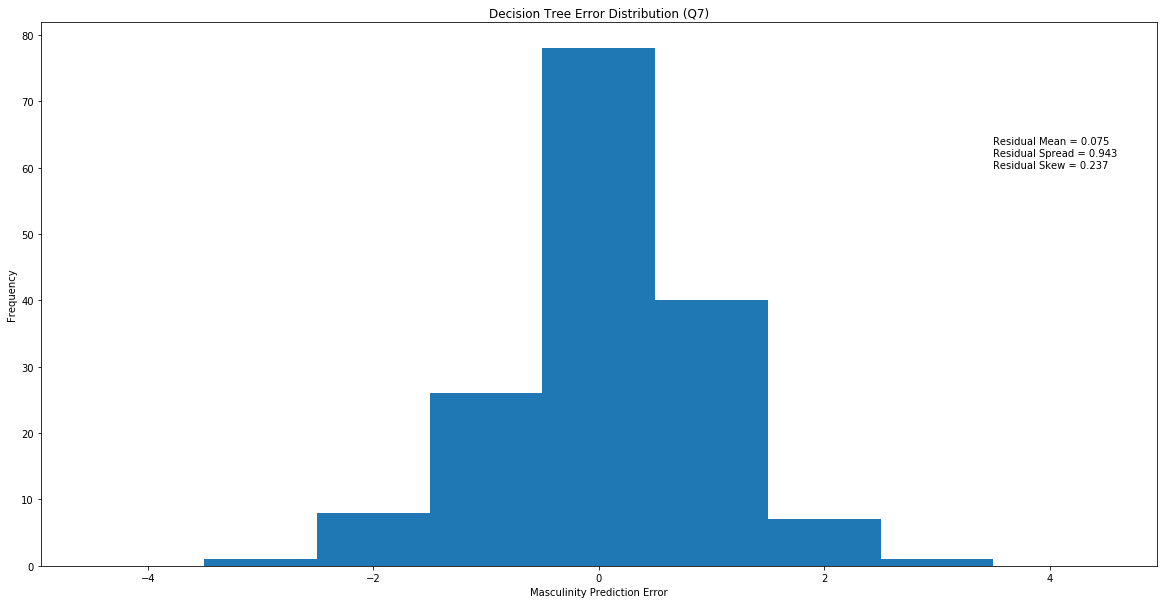

In [19]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
scores = cross_val_score(clf, x_test, y_test, cv = kf)

print('Mean Accuracy   = {0:2.1f}% +- {2:2.1f}%\nMedian Accuracy = {1:2.1f}% +- {2:2.1f}%'.format(
    np.mean(scores) * 100, np.median(scores) * 100, np.std(scores) * 200))

residuals = np.array([clf.predict([i]) for i in x_test]).reshape(-1, 1) - np.array(y_test)
plot.figure(figsize = (20, 10))
plot.hist(residuals.flatten(), bins = 9, range = (-4.5, 4.5))
plot.text(3.5, 60, 'Residual Mean = {:1.3f}\nResidual Spread = {:1.3f}\nResidual Skew = {:1.3f}'.format(residuals.mean(), residuals.std(), skew(residuals)))
plot.xlabel('Masculinity Prediction Error')
plot.ylabel('Frequency')
plot.title('Decision Tree Error Distribution (Q7)')
plot.show()

In [20]:
x = scrub_data[['q0008_0001', 'q0008_0002', 'q0008_0003', 'q0008_0004', 
                'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008', 
                'q0008_0009', 'q0008_0010', 'q0008_0011']]
y = scrub_data[['q0001']]
x = np.array([list(i) for i in x.values])
y = np.array([list(i) for i in y.values])
kf = KFold(n_splits = 10, shuffle = True)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

Mean Accuracy   = 45.4% +- 20.6%
Median Accuracy = 43.8% +- 20.6%


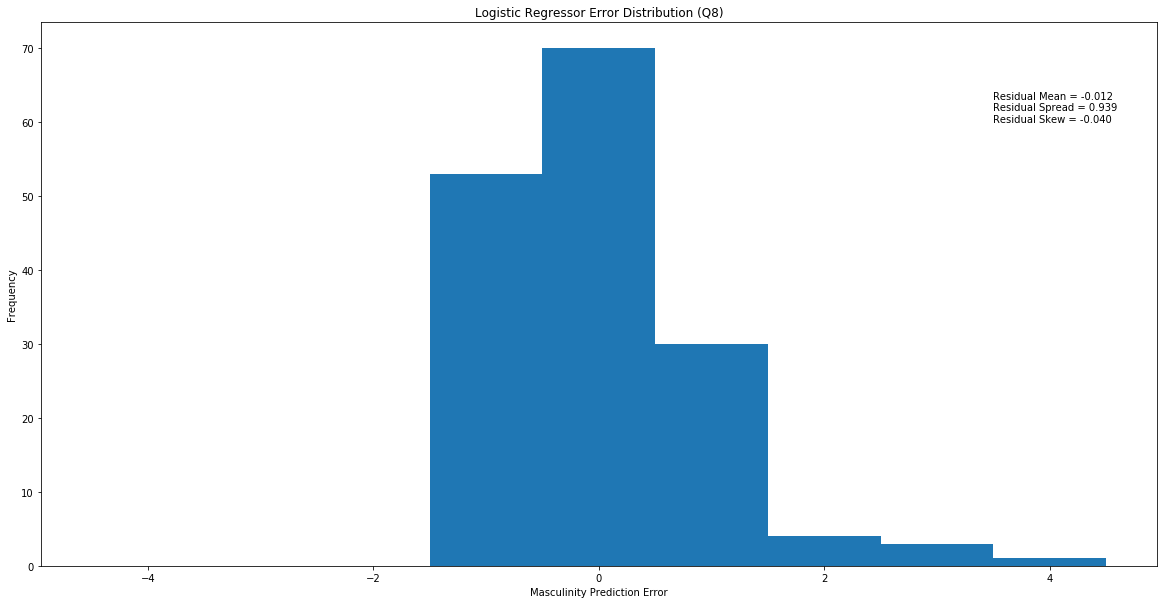

In [21]:
reg = linear_model.LogisticRegression()
reg.fit(x_train, np.ravel(y_train))
scores = cross_val_score(reg, x_test, np.ravel(y_test), cv = kf)

print('Mean Accuracy   = {0:2.1f}% +- {2:2.1f}%\nMedian Accuracy = {1:2.1f}% +- {2:2.1f}%'.format(
    np.mean(scores) * 100, np.median(scores) * 100, np.std(scores) * 200))

residuals = np.array([reg.predict([i]) for i in x_test]).reshape(-1, 1) - np.array(y_test)
plot.figure(figsize = (20, 10))
plot.hist(residuals.flatten(), bins = 9, range = (-4.5, 4.5))
plot.text(3.5, 60, 'Residual Mean = {:1.3f}\nResidual Spread = {:1.3f}\nResidual Skew = {:1.3f}'.format(residuals.mean(), residuals.std(), skew(residuals)))
plot.xlabel('Masculinity Prediction Error')
plot.ylabel('Frequency')
plot.title('Logistic Regressor Error Distribution (Q8)')
plot.show()

Mean Accuracy   = 38.5% +- 26.3%
Median Accuracy = 43.8% +- 26.3%


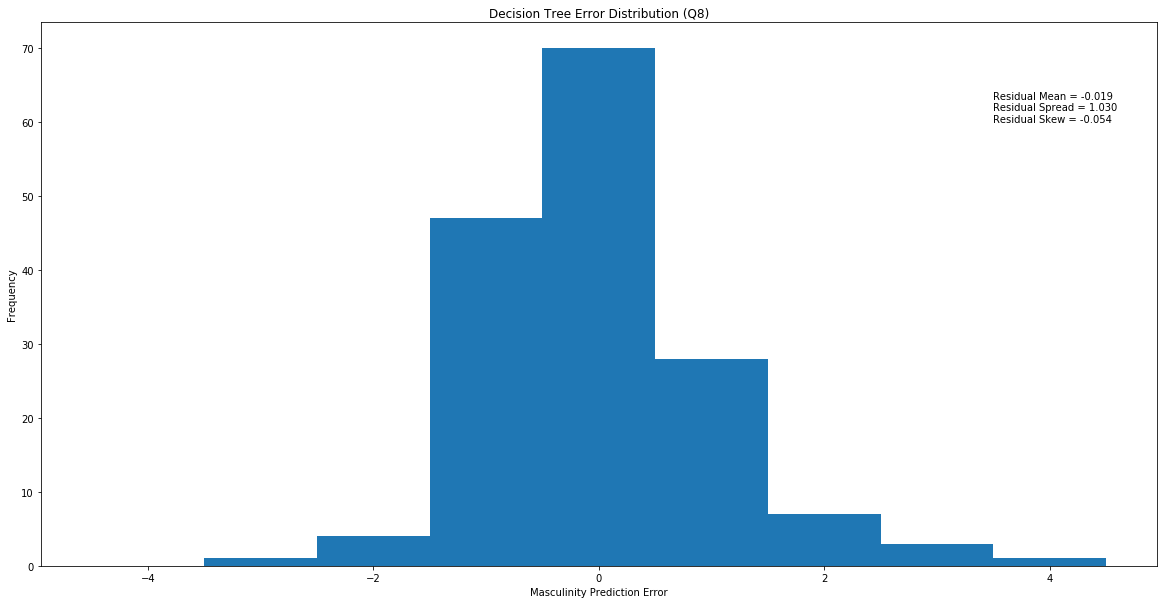

In [22]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
scores = cross_val_score(clf, x_test, y_test, cv = kf)

print('Mean Accuracy   = {0:2.1f}% +- {2:2.1f}%\nMedian Accuracy = {1:2.1f}% +- {2:2.1f}%'.format(
    np.mean(scores) * 100, np.median(scores) * 100, np.std(scores) * 200))

residuals = np.array([clf.predict([i]) for i in x_test]).reshape(-1, 1) - np.array(y_test)
plot.figure(figsize = (20, 10))
plot.hist(residuals.flatten(), bins = 9, range = (-4.5, 4.5))
plot.text(3.5, 60, 'Residual Mean = {:1.3f}\nResidual Spread = {:1.3f}\nResidual Skew = {:1.3f}'.format(residuals.mean(), residuals.std(), skew(residuals)))
plot.xlabel('Masculinity Prediction Error')
plot.ylabel('Frequency')
plot.title('Decision Tree Error Distribution (Q8)')
plot.show()

In [23]:
x = scrub_data[['q0020_0001', 'q0020_0002', 'q0020_0003', 'q0020_0004', 
                'q0020_0005', 'q0020_0006']]
y = scrub_data[['q0001']]
x = np.array([list(i) for i in x.values])
y = np.array([list(i) for i in y.values])
kf = KFold(n_splits = 10, shuffle = True)
kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]   

Mean Accuracy   = 39.7% +- 32.6%
Median Accuracy = 46.9% +- 32.6%


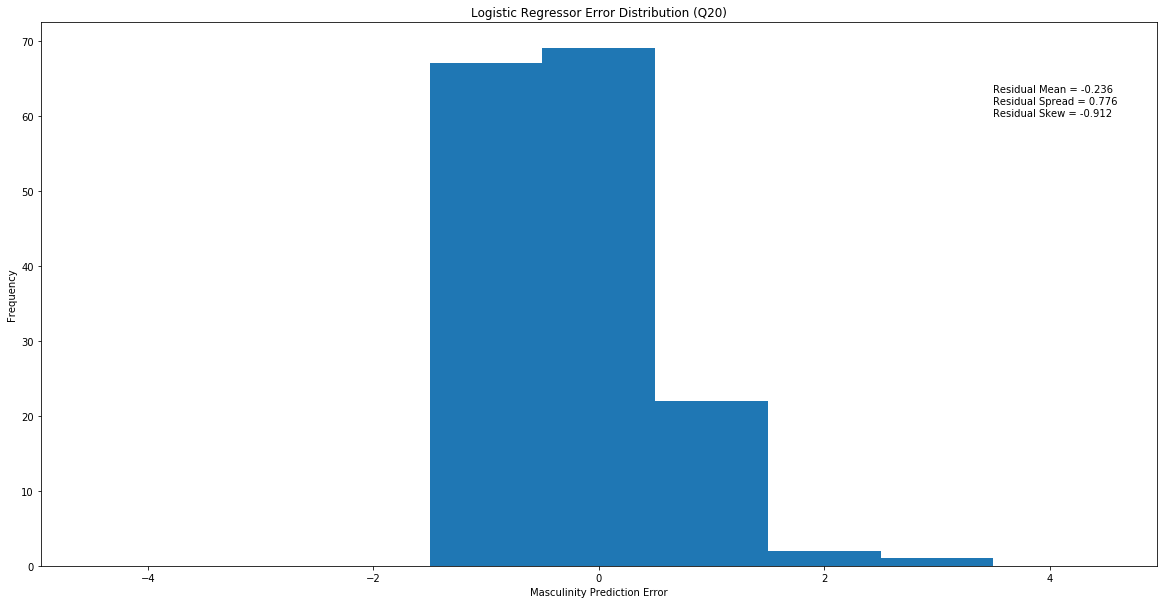

In [24]:
reg = linear_model.LogisticRegression()
reg.fit(x_train, np.ravel(y_train))
scores = cross_val_score(reg, x_test, np.ravel(y_test), cv = kf)

print('Mean Accuracy   = {0:2.1f}% +- {2:2.1f}%\nMedian Accuracy = {1:2.1f}% +- {2:2.1f}%'.format(
    np.mean(scores) * 100, np.median(scores) * 100, np.std(scores) * 200))

residuals = np.array([reg.predict([i]) for i in x_test]).reshape(-1, 1) - np.array(y_test)
plot.figure(figsize = (20, 10))
plot.hist(residuals.flatten(), bins = 9, range = (-4.5, 4.5))
plot.text(3.5, 60, 'Residual Mean = {:1.3f}\nResidual Spread = {:1.3f}\nResidual Skew = {:1.3f}'.format(residuals.mean(), residuals.std(), skew(residuals)))
plot.xlabel('Masculinity Prediction Error')
plot.ylabel('Frequency')
plot.title('Logistic Regressor Error Distribution (Q20)')
plot.show()

Mean Accuracy   = 51.0% +- 18.2%
Median Accuracy = 53.1% +- 18.2%


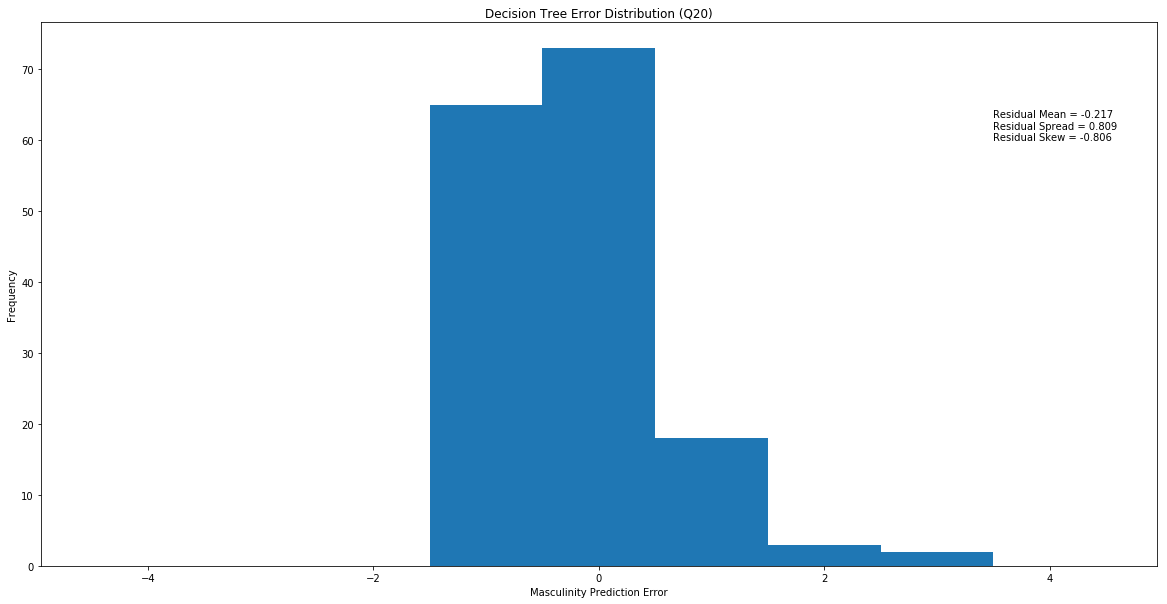

In [25]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
scores = cross_val_score(clf, x_test, y_test, cv = kf)

print('Mean Accuracy   = {0:2.1f}% +- {2:2.1f}%\nMedian Accuracy = {1:2.1f}% +- {2:2.1f}%'.format(
    np.mean(scores) * 100, np.median(scores) * 100, np.std(scores) * 200))

residuals = np.array([clf.predict([i]) for i in x_test]).reshape(-1, 1) - np.array(y_test)
plot.figure(figsize = (20, 10))
plot.hist(residuals.flatten(), bins = 9, range = (-4.5, 4.5))
plot.text(3.5, 60, 'Residual Mean = {:1.3f}\nResidual Spread = {:1.3f}\nResidual Skew = {:1.3f}'.format(residuals.mean(), residuals.std(), skew(residuals)))
plot.xlabel('Masculinity Prediction Error')
plot.ylabel('Frequency')
plot.title('Decision Tree Error Distribution (Q20)')
plot.show()